In [1]:
import pandas as pd
import os
import tqdm

In [2]:
#data_path1 = "/home/noctis/下载/#APTOS/aptos2019-blindness-detection/train_images"
#data_path2 = "/home/noctis/下载/#APTOS/IDRID_modified/all"

csv_path1 = "/home/noctis/下载/#APTOS/aptos2019-blindness-detection/train.csv"
csv_path2 = "/home/noctis/下载/#APTOS/IDRID_modified/all_IDRiD.csv"

df_1 = pd.read_csv(csv_path1)
df_2 = pd.read_csv(csv_path2)

In [3]:
#new_pd = pd.concat([df_1,df_2])  

In [4]:
#new_pd.to_csv("2019+IDRID.csv",index=False)

In [5]:
df_3 = pd.read_csv(csv_path1)

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df_3.diagnosis.value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

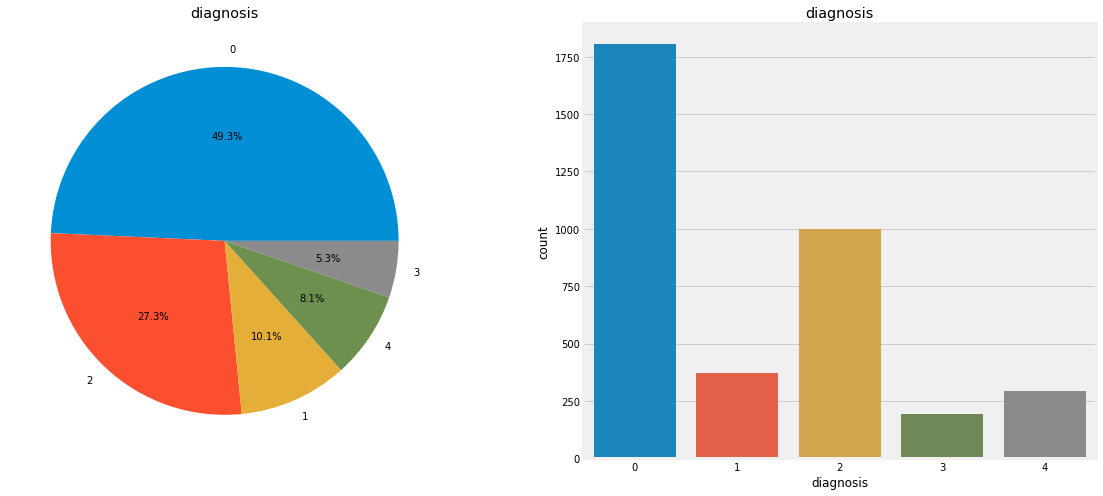

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_3['diagnosis'].value_counts().plot.pie(explode=[0,0,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=df_3,ax=ax[1])
ax[1].set_title('diagnosis')
plt.show()

In [9]:
#numbers of needing to add aug pics for label 1
aug_nums_1 = df_3.diagnosis.value_counts().max()-df_3.diagnosis.value_counts()[1]
#numbers of needing to add aug pics for label 2
aug_nums_2 = df_3.diagnosis.value_counts().max()-df_3.diagnosis.value_counts()[2]
#numbers of needing to add aug pics for label 3
aug_nums_3 = df_3.diagnosis.value_counts().max()-df_3.diagnosis.value_counts()[3]
#numbers of needing to add aug pics for label 4
aug_nums_4 = df_3.diagnosis.value_counts().max()-df_3.diagnosis.value_counts()[4]
print(aug_nums_1,aug_nums_2,aug_nums_3,aug_nums_4)

1435 806 1612 1510


In [10]:
df_3[df_3["diagnosis"]==4]

,id_code,diagnosis
1,001639a390f0,4
5,0083ee8054ee,4
32,0243404e8a00,4
34,02685f13cefd,4
38,02dda30d3acf,4
40,0318598cfd16,4
43,034cb07a550f,4
47,03a7f4a5786f,4
88,07122e268a1d,4
105,080ee76c958c,4


In [11]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,Rotate,RGBShift,ChannelShuffle,GaussNoise,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,RandomBrightness,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose,GaussianBlur,RandomBrightnessContrast,RandomSnow
)

#image = cv2.imread("/home/noctis/下载/#APTOS/concat_data/2019+IDRID/0a74c92e287c.png")#download_image('https://d177hi9zlsijyy.cloudfront.net/wp-content/uploads/sites/2/2018/05/11202041/180511105900-atlas-boston-dynamics-robot-running-super-tease.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def strong_aug(p=0.9):
    return Compose([
        Rotate(limit=45,border_mode=1),
        HorizontalFlip(p=0.5),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.4),
        OneOf([
            MotionBlur(p=1),
            MedianBlur(p=1),
            Blur(p=1),
            GaussianBlur(p=1)
        ], p=0.4),
        
        OneOf([
            CLAHE(clip_limit=2,p=1),
            IAASharpen(p=1),
            IAAEmboss(p=1),
            RandomBrightnessContrast(p=1),            
        ], p=0.3),
    ], p=p)


In [12]:
loading_path = "/home/noctis/下载/#APTOS/concat_data/2019+IDRID/"
writing_path = "/devdata/#APTOS/balanced-data/"
aug_df = pd.DataFrame(columns=['id_code','diagnosis'])


df_label1_add = df_3[df_3["diagnosis"]==1].sample(n=aug_nums_1,replace=True,random_state=1)

for count,ids in enumerate(df_label1_add["id_code"]):
    read_pic_path = loading_path + ids + ".png"
    write_name = ids + "aug{}".format(count)
    write_pic_path = writing_path + write_name + ".png"
    image = cv2.imread(read_pic_path)
    aug = strong_aug(p=0.9)
    image = aug(image=image)['image']
    aug_df = aug_df.append({'id_code': write_name,'diagnosis':1}, ignore_index=True)
    cv2.imwrite(write_pic_path, image)
    
    print(count,ids)

0 19722bff5a09
1 9a3109657ac1
2 31cb39681f6a
3 a95858e052d6
4 82ac8463fadd
5 5633ced07d8e
6 e07045d7c5f7
7 59e5212f7139
8 53f6c1c65c04
9 30cab14951ac
10 9ed666e982cd
11 bb9a3d835a94
12 71c1a3cdbe47
13 b9b99dad668d
14 a8c950a99107
15 f5650eb52640
16 a8582e346df0
17 6298468d7d75
18 22325552a4e3
19 2f4e81787d9b
20 8c2f0f04e1ed
21 a2696f444ecb
22 ef8109305128
23 38e0e28d35d3
24 5879285f9d8d
25 059bc89df7f4
26 d1cad012a254
27 d06ccd0cf4b8
28 0f495d87656a
29 cd5714db652d
30 00cb6555d108
31 cfd1bd0fcbb4
32 89d9c071a56f
33 b17f0b81dab3
34 8dc22e65c06f
35 5879285f9d8d
36 4e82c3c8d31f
37 5090917a2676
38 12e3f5f2cb17
39 30cab14951ac
40 22098b1fe461
41 cd5714db652d
42 01b3aed3ed4c
43 bb783d8e496f
44 1c3a6b4449e9
45 3461dc601cc2
46 10f36b0239fb
47 cae51154e1ce
48 e25ccfe38e44
49 4d7d6928534a
50 c7b622ec8104
51 0a3202889f4d
52 2d7666b8884f
53 7ef5ff774a48
54 107aea0d9289
55 fe674c2f73f5
56 944a233fbf8e
57 bc73ce76ec43
58 613bacb35c05
59 4a213b405ee4
60 0f495d87656a
61 b22354b5f94b
62 7ea756985353
63

490 523b3f0fc646
491 2f2e1949ad56
492 655cafb4c932
493 655cafb4c932
494 1c0cf251b426
495 dd19428c3d29
496 89ed6a0dd53f
497 f6f7dba7104d
498 19e350c7c83c
499 7005be54cab1
500 51131b48f9d4
501 89d9c071a56f
502 af133a85ea0c
503 977e1ca77653
504 8fc09fecd22f
505 c739ff9580d3
506 7f60f2a083d3
507 03e25101e8e8
508 059bc89df7f4
509 c40976189f22
510 f7fec8935126
511 dd19428c3d29
512 172df1330a60
513 1116271db4ea
514 71f6a6e4620a
515 358d2224de73
516 12e3f5f2cb17
517 6d292ca4c9ad
518 0684311afdfc
519 d5b4705ac2ee
520 ad3fc5076852
521 cc12453ea915
522 f0c13be90519
523 94b1d8ad35ec
524 36041171f441
525 bebb3f167654
526 66cd9c28e636
527 dd19428c3d29
528 f72ef9ceeaa8
529 248139c423c4
530 ca25745942b0
531 2a8a9e957a6c
532 513b0a4651fa
533 90c982cc2d96
534 5b068765e846
535 63363410389a
536 1a03a7970337
537 bebb3f167654
538 259d30f693b6
539 12ce6a1a1f31
540 7427dedafccf
541 f72ef9ceeaa8
542 ead23cc922ed
543 fb6b8200b7f8
544 5a091e8cd95c
545 30cab14951ac
546 3de8ad4151e1
547 756b0d6488bb
548 22a6da0053

972 ae8472f8d310
973 c9485c38fdd5
974 582115961a3d
975 12ce6a1a1f31
976 db690e2d02f8
977 71c1a3cdbe47
978 98fbe56dcc2c
979 71f6a6e4620a
980 6b00cb764237
981 52ae917fcea4
982 3c72f580d4ba
983 1c3a6b4449e9
984 a8c950a99107
985 4a213b405ee4
986 e9ff9352ccb3
987 40e9b5630438
988 bebb3f167654
989 2d7666b8884f
990 4e6071b73120
991 8bc6716c2238
992 a8c950a99107
993 cf0575534cec
994 e9ff9352ccb3
995 5347b4c8e9b3
996 cab3dfa7962d
997 06b71823f9cd
998 fca931da5c5e
999 13ab8db8c700
1000 0684311afdfc
1001 49c5e7f6b8d2
1002 5671eb95512b
1003 6377e23928f6
1004 d5b4705ac2ee
1005 5b068765e846
1006 587146a55885
1007 d85d052900b4
1008 33b893e18eb3
1009 eba3acc42197
1010 8bbd7835e9aa
1011 24b943fe725e
1012 6b00cb764237
1013 5671eb95512b
1014 665ce639a331
1015 77a9538b8362
1016 b17f0b81dab3
1017 0d310aba6373
1018 4c129470cec4
1019 0eb52045349f
1020 2f2e1949ad56
1021 09935d72892b
1022 0dce95217626
1023 b22354b5f94b
1024 1c0cf251b426
1025 b9b99dad668d
1026 fca931da5c5e
1027 cf0575534cec
1028 358d2224de73
10

1429 b8ebedd382de
1430 523b3f0fc646
1431 58184d6fd087
1432 29b52f64d2db
1433 5712e2aa73a2
1434 8676427e4625


In [13]:
#aug_df = pd.DataFrame(columns=['id_code','diagnosis'])


df_label2_add = df_3[df_3["diagnosis"]==2].sample(n=aug_nums_2,replace=True,random_state=1)

for count,ids in enumerate(df_label2_add["id_code"]):
    read_pic_path = loading_path + ids + ".png"
    write_name = ids + "aug{}".format(count)
    write_pic_path = writing_path + write_name + ".png"
    image = cv2.imread(read_pic_path)
    aug = strong_aug(p=0.9)
    image = aug(image=image)['image']
    aug_df = aug_df.append({'id_code': write_name,'diagnosis':2}, ignore_index=True)
    cv2.imwrite(write_pic_path, image)
    
    print(count,ids)

0 0a1076183736
1 39b5b05d6cd9
2 e3a7671f787b
3 1411c8ab7161
4 bf9cba745efc
5 e31c42a8652b
6 b0d6417bad3e
7 a19507501b40
8 d41b33fcb94f
9 f30f203ef51e
10 23148a40ecb0
11 1f4bf8e28b41
12 f7edc074f06b
13 92d8a7c8e718
14 b99c825b93c5
15 807135cbc438
16 5c6194562ed2
17 43fb6eda9b97
18 295fdc964f6e
19 436e1793d240
20 3e86335bc2fd
21 52dbec057cc8
22 e599151ca14b
23 7550966ef777
24 e387311a840e
25 3e1f8fecb06f
26 7b8c78b41c0d
27 a66c3165876f
28 e7a7187066ad
29 5e52c9fe676f
30 8dba09a4e5ed
31 921433215353
32 32a3eb37ff40
33 fac399455195
34 bb733062f494
35 7ec1ffe8220b
36 77543f66a84a
37 d94e10f42861
38 17188c13e635
39 2241b7e90782
40 5cde55f745af
41 01c7808d901d
42 4b422b48d0d4
43 cf0824f53dd9
44 86fbac86ed3e
45 4a0890b08532
46 81bc03e2ff2b
47 e150935f66a6
48 4a558a1cd243
49 310c27067ac0
50 417f408ee8e0
51 b498b84d383f
52 a386ec9aabde
53 9eaac43744f5
54 6810410187a0
55 a015ce4f51ad
56 70ed3ec68b94
57 8871e6a26596
58 13d71389563f
59 5a5d3798c357
60 6f4e0538d1e4
61 e65f94ad9be3
62 8d7bb0649a02
63

489 1d14dd912671
490 9c5dd3612f0c
491 314862758acf
492 f0800723bc63
493 c9d42d7534e0
494 66bae1ba227f
495 50d8a8fb7737
496 bfda2fd0533a
497 31b5d6fb0256
498 18af532e7e1e
499 2700754f71e9
500 9d98a0b585f2
501 47b756014447
502 d473f6fafba0
503 c73c5f6ef664
504 4dbce359d0e1
505 882a71de424e
506 a15470303941
507 b89938407ee6
508 5e18af29d812
509 66bae1ba227f
510 e03e70bc8bba
511 453d553b0a94
512 b8ac328009e0
513 27b68863349f
514 041f09eec1e8
515 36a1e3c780a0
516 e9f82b5bbaf4
517 4b422b48d0d4
518 7d8f67cadc29
519 8cb6b5b2f19c
520 541db13517e2
521 33e8e26a75d4
522 1c5e6cdc7ee1
523 812d5adafaf2
524 52dbec057cc8
525 82910bba4753
526 1943983492e5
527 c7c0470bcf87
528 b187b3c93afb
529 b0d6417bad3e
530 6ba5ed791444
531 a8eb35b3bcd2
532 c70d09370109
533 38fe9f854046
534 e65f94ad9be3
535 8ff2733f6aef
536 e1418d28d668
537 5e7cc6ab4ac4
538 fc603cbedb41
539 8a67f1efa315
540 3a1d3ce00f0c
541 79be2ff796bf
542 39923b29988a
543 c3acf47700ea
544 e663c6627a95
545 83d6e40c869f
546 19113e5f45ec
547 a3957df90a

In [14]:
aug_df.diagnosis.value_counts()

1    1435
2     806
Name: diagnosis, dtype: int64

In [15]:
#aug_df = pd.DataFrame(columns=['id_code','diagnosis'])


df_label3_add = df_3[df_3["diagnosis"]==3].sample(n=aug_nums_3,replace=True,random_state=1)

for count,ids in enumerate(df_label3_add["id_code"]):
    read_pic_path = loading_path + ids + ".png"
    write_name = ids + "aug{}".format(count)
    write_pic_path = writing_path + write_name + ".png"
    image = cv2.imread(read_pic_path)
    aug = strong_aug(p=0.9)
    image = aug(image=image)['image']
    aug_df = aug_df.append({'id_code': write_name,'diagnosis':3}, ignore_index=True)
    cv2.imwrite(write_pic_path, image)
    
    print(count,ids)

0 3435fd8675a2
1 b3d135bd3bb5
2 6181aa9f75f4
3 b191ba0a2b12
4 adb56cecafaf
5 6baafa56895c
6 fe0fc67c7980
7 b960142a8de7
8 a9e984b57556
9 6089fa333013
10 aea59ebec445
11 24b87f744598
12 e8d1c6c07cf2
13 19244004583f
14 86d6808f0609
15 bb7e0a2544cd
16 b310bd564329
17 c76664770c07
18 c9ea9d5eab65
19 b6bfe9db60e5
20 42cc993f23a9
21 5b3e7197ac1c
22 80ca40196225
23 74eee788edee
24 b5834ee64541
25 b191ba0a2b12
26 093a42649c29
27 4fef9ed8a4c5
28 4f0866b90c27
29 1b495ac025b7
30 4c9f0fdaaef7
31 03c85870824c
32 a8e88d4891c4
33 4df6a81b476e
34 0c917c372572
35 b5834ee64541
36 9a94e0316ee3
37 e4210e7fe587
38 9fefe2b44795
39 2b48daf24be0
40 6089fa333013
41 aba3063c5413
42 c0a0828e01b4
43 4294a14c656a
44 4c9f0fdaaef7
45 05cd0178ccfe
46 237c078d00fc
47 39aa3cd93c50
48 697538183db5
49 25b0e72705a8
50 457c7c927e27
51 6d0c0531083f
52 913490237ad4
53 9a94e0316ee3
54 38055d8b9f08
55 15bed5adde74
56 50a2aef380c8
57 24b87f744598
58 91b6ebaa3678
59 af3b0115aad1
60 25b0e72705a8
61 c5a9ebef1517
62 8a9bef2fbd4e
63

489 80ca40196225
490 f9156aeffc5e
491 e1900014dabf
492 2bb063318cf1
493 8201cab8322d
494 3b018e8b7303
495 237c078d00fc
496 fcc6aa6755e6
497 6baafa56895c
498 1ab3f1c71a5f
499 bec0acd539b2
500 6a244e855d0e
501 2f42e20db938
502 069f43616fab
503 36865bbc64d6
504 a4b8de38eac1
505 537e50fdf22e
506 d16398c971e9
507 d16398c971e9
508 383e72af1955
509 6b128e648646
510 8958a4d17b7e
511 352e4a939242
512 a14bbd9a583e
513 e52ed5c29c5e
514 a14bbd9a583e
515 070f67572d03
516 b019a49787c1
517 36b5b3c9fb32
518 070f67572d03
519 093a42649c29
520 3435fd8675a2
521 8b76c3c5cb3e
522 6b128e648646
523 2f42e20db938
524 2665f72e2dd3
525 e93394175a19
526 6a244e855d0e
527 2b48daf24be0
528 e1900014dabf
529 e32a359be36d
530 0cb14014117d
531 537e50fdf22e
532 05cd0178ccfe
533 4b618537d52f
534 80e7cc0a0649
535 fda39982a810
536 6d0c0531083f
537 269b44e628eb
538 d868acdccb5b
539 fe0fc67c7980
540 d868acdccb5b
541 bb7e0a2544cd
542 6b128e648646
543 8a234d68b27e
544 457c7c927e27
545 b2ffa3e18559
546 d035c2bd9104
547 3f49f8d100

971 352e4a939242
972 ad2f0b9d059c
973 6061f5b7378d
974 697538183db5
975 6253f23229b1
976 070f67572d03
977 71a39c660432
978 f901d460517c
979 2bb063318cf1
980 093a42649c29
981 51da6aebba8f
982 d035c2bd9104
983 e32a359be36d
984 6efa36d59ada
985 3b018e8b7303
986 50a2aef380c8
987 3435fd8675a2
988 e4210e7fe587
989 71a39c660432
990 15bed5adde74
991 457c7c927e27
992 772af553b8b7
993 269b44e628eb
994 191a711852bd
995 1623e8e3adc4
996 070f67572d03
997 b2ffa3e18559
998 c9ea9d5eab65
999 bb5083fae98f
1000 e32a359be36d
1001 093a42649c29
1002 1623e8e3adc4
1003 74eee788edee
1004 4f0866b90c27
1005 50a2aef380c8
1006 093a42649c29
1007 299086c6d1b5
1008 f576e45d1da2
1009 269b44e628eb
1010 9b093fe95d6b
1011 39aa3cd93c50
1012 4c570172778b
1013 070f67572d03
1014 42cc993f23a9
1015 7b29e3783919
1016 fda39982a810
1017 ed6704e3b72e
1018 8b76c3c5cb3e
1019 d16398c971e9
1020 6a244e855d0e
1021 d868acdccb5b
1022 f092febbf5c0
1023 069f43616fab
1024 39aa3cd93c50
1025 b310bd564329
1026 299086c6d1b5
1027 697538183db5
102

1428 8a234d68b27e
1429 8201cab8322d
1430 4d9fc85a8259
1431 80e7cc0a0649
1432 e13412678eff
1433 fe0fc67c7980
1434 070f67572d03
1435 788ddb0b70b7
1436 697538183db5
1437 4c570172778b
1438 383e72af1955
1439 19244004583f
1440 762d6e5d5068
1441 166068a24416
1442 7b29e3783919
1443 e76a9cbb2a8c
1444 b7e0f95353f2
1445 1623e8e3adc4
1446 fb61230b99dd
1447 af3b0115aad1
1448 a4b8de38eac1
1449 fe0fc67c7980
1450 4c570172778b
1451 aae8f9f3ef8c
1452 ad2f0b9d059c
1453 15f440753916
1454 5b3e7197ac1c
1455 2b48daf24be0
1456 457c7c927e27
1457 d3e884109b45
1458 810d3779abd9
1459 f901d460517c
1460 2bb063318cf1
1461 910bfd38e2f5
1462 d2ffe9287dc7
1463 d035c2bd9104
1464 42cc993f23a9
1465 4360a112db10
1466 070f67572d03
1467 2f42e20db938
1468 a8e88d4891c4
1469 0cb14014117d
1470 2bb063318cf1
1471 d2ffe9287dc7
1472 762d6e5d5068
1473 f9156aeffc5e
1474 352e4a939242
1475 b310bd564329
1476 3b018e8b7303
1477 e1900014dabf
1478 093a42649c29
1479 fcc6aa6755e6
1480 91cf56d3d1af
1481 f5a8c6426a71
1482 80ca40196225
1483 7b490

In [16]:
aug_df.diagnosis.value_counts()

3    1612
1    1435
2     806
Name: diagnosis, dtype: int64

In [17]:
#aug_df = pd.DataFrame(columns=['id_code','diagnosis'])


df_label4_add = df_3[df_3["diagnosis"]==4].sample(n=aug_nums_4,replace=True,random_state=1)

for count,ids in enumerate(df_label4_add["id_code"]):
    read_pic_path = loading_path + ids + ".png"
    write_name = ids + "aug{}".format(count)
    write_pic_path = writing_path + write_name + ".png"
    image = cv2.imread(read_pic_path)
    aug = strong_aug(p=0.9)
    image = aug(image=image)['image']
    aug_df = aug_df.append({'id_code': write_name,'diagnosis':4}, ignore_index=True)
    cv2.imwrite(write_pic_path, image)
    
    print(count,ids)

0 21abd36095a1
1 cd972e5639e0
2 3ccf96c1dd6d
3 e037643244b7
4 b55d2ddb3e75
5 702de9dcde32
6 7b211d8bd249
7 6e73acb2cf60
8 3ca637fddd56
9 d0b132d2c7ec
10 f2d2a0c92034
11 95e732e043a1
12 f0098e9d4aee
13 e019b3e0f33d
14 df4aec4a0eaf
15 84c663f39632
16 29bc0e721cfe
17 3b232b394e4f
18 bcd503c726ba
19 d2901144070c
20 4bd941611343
21 78b3f819dcc5
22 03a7f4a5786f
23 165cd2070ebd
24 0083ee8054ee
25 b99afe7137fb
26 e740af6ac6ea
27 bd5013540a13
28 78b3f819dcc5
29 65c958379680
30 69fff98cb32a
31 1c4f3aa4df06
32 3ca637fddd56
33 281d7b7c7676
34 02685f13cefd
35 f1dc26c4bfa3
36 254052cf3e48
37 4462fba1d2a1
38 1a7e3356b39c
39 61e301bd3c25
40 0ceb222f6629
41 3a1ecf5e2839
42 aa6673241154
43 19ef4d292196
44 c5e238aa18be
45 f549294e12e1
46 80964d8e0863
47 60f15dd68d30
48 165cd2070ebd
49 e7d2c2c3b30f
50 a81b06f50612
51 6d259b5b4c76
52 f0f89314e860
53 838c87c63422
54 4a693dd3921a
55 8ae049175db6
56 7270367410a1
57 f850cb51fdba
58 e821c1b6417a
59 f0f89314e860
60 7a238a1d3cf3
61 d1a24527a15d
62 4ccfa0b4e96c
63

489 7c629b491d1a
490 785777558f05
491 785777558f05
492 3b232b394e4f
493 8eeac97f02f0
494 a5c9a8c726b2
495 4dd71fc7f22b
496 22895c89792f
497 e62490b7d0e9
498 e62490b7d0e9
499 d803598dabda
500 f8cf7ed8ef00
501 3206171db5be
502 e62490b7d0e9
503 87774aafe068
504 6fe67482bfae
505 66375b3c64db
506 95e732e043a1
507 4462fba1d2a1
508 e019b3e0f33d
509 64fedbf97473
510 51af8c112682
511 bfefa7344e7d
512 d1a24527a15d
513 80964d8e0863
514 d85ea1220a03
515 0083ee8054ee
516 eadc57064154
517 65e120143825
518 21d18b022429
519 bba38f2294a3
520 8ae049175db6
521 875a2fc5fe23
522 e32dc722eca5
523 d659d7fd5ccf
524 64bad93fde3f
525 64fedbf97473
526 ff8a0b45c789
527 1b32e1d775ea
528 b55d2ddb3e75
529 64fedbf97473
530 1e9224ccca95
531 97da093947e8
532 3ac3fbfca7d4
533 e4730ddde408
534 001639a390f0
535 f1dc26c4bfa3
536 7b211d8bd249
537 c1896142a20a
538 7efc91af4ae6
539 f025f33b2c9b
540 262ad704319c
541 fb696a8e055a
542 3b232b394e4f
543 1efa5d443707
544 dad71ba27a9b
545 2628305cbb29
546 312694ea8e6a
547 80964d8e08

971 fa59221cf464
972 df4913ca3712
973 6f923b60934b
974 0ceb222f6629
975 f1dc26c4bfa3
976 37c4dfe03aba
977 613028ede6a0
978 69fff98cb32a
979 1a7e3356b39c
980 5b76117c4bcb
981 d0b132d2c7ec
982 26463a5fb949
983 8785b71238d8
984 7b211d8bd249
985 bcd503c726ba
986 d1a24527a15d
987 9fab29e69a6b
988 f1dc26c4bfa3
989 f1dc26c4bfa3
990 a81b06f50612
991 3ee4841936ef
992 8f318a978844
993 0981195eb9fb
994 6daef3e5ca22
995 5b5b80a3edee
996 c5e238aa18be
997 785777558f05
998 f1dc26c4bfa3
999 d48178e4a49b
1000 2f7789c1e046
1001 df4aec4a0eaf
1002 8fd7ad26e691
1003 cb547e723a16
1004 4dd71fc7f22b
1005 f72adcac5638
1006 d2c2f02bb313
1007 1fd5d860d4d7
1008 080ee76c958c
1009 499c8df39222
1010 46cdc8b685bd
1011 8fd7ad26e691
1012 702de9dcde32
1013 a11bf2edd470
1014 f1dc26c4bfa3
1015 d10ef306996b
1016 46cdc8b685bd
1017 a0cd7bffdaa0
1018 3810040096cb
1019 4a693dd3921a
1020 bd5013540a13
1021 ba08cee68c71
1022 66a0bf258013
1023 b87f9c59748b
1024 65e120143825
1025 1a90fad9ffa2
1026 f0f89314e860
1027 3b4a5fcbe5e0
102

1428 2fde69f20585
1429 61e301bd3c25
1430 3b4a5fcbe5e0
1431 e821c1b6417a
1432 d51b3fe0fa1b
1433 e3ab63dc9a60
1434 222f3ee3a1e8
1435 21abd36095a1
1436 7b211d8bd249
1437 f2d2a0c92034
1438 cd972e5639e0
1439 6daef3e5ca22
1440 2fde69f20585
1441 9859e2a6cc24
1442 b87f9c59748b
1443 c3d12a23f451
1444 d10ef306996b
1445 df4aec4a0eaf
1446 001639a390f0
1447 79d44db3da2d
1448 e019b3e0f33d
1449 5bda2ed09e62
1450 3ca637fddd56
1451 e62490b7d0e9
1452 7b211d8bd249
1453 a2ddabee14e9
1454 3b4a5fcbe5e0
1455 95e732e043a1
1456 3206171db5be
1457 65c958379680
1458 44ecf3f4efa5
1459 c8d2d32f7f29
1460 08a3875063c3
1461 46cdc8b685bd
1462 c1799a6f5c65
1463 61f403fdb434
1464 e4f12411fd85
1465 613028ede6a0
1466 ab1c20a94f3f
1467 de16416220de
1468 bba38f2294a3
1469 8db2ce991101
1470 aeed1f251ceb
1471 e62490b7d0e9
1472 3ee4841936ef
1473 ba735b286d62
1474 664b1f9a2087
1475 4dc2211a1c31
1476 b70cb31b9abb
1477 dad71ba27a9b
1478 887c26fc0e1f
1479 fdd534271f3d
1480 254052cf3e48
1481 a0cd7bffdaa0
1482 66375b3c64db
1483 e32dc

In [21]:
aug_df.diagnosis.value_counts()

3    1612
4    1510
1    1435
2     806
Name: diagnosis, dtype: int64

In [20]:
aug_df

,id_code,diagnosis
0,19722bff5a09aug0,1
1,9a3109657ac1aug1,1
2,31cb39681f6aaug2,1
3,a95858e052d6aug3,1
4,82ac8463faddaug4,1
5,5633ced07d8eaug5,1
6,e07045d7c5f7aug6,1
7,59e5212f7139aug7,1
8,53f6c1c65c04aug8,1
9,30cab14951acaug9,1


In [22]:
aug_df.to_csv("add_data_19.csv",index=False)

In [23]:
all_data = pd.concat([df_3,aug_df])  


In [24]:
all_data.to_csv("balanced_data_19.csv",index=False)

In [25]:
all_data

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
5,0083ee8054ee,4
6,0097f532ac9f,0
7,00a8624548a9,2
8,00b74780d31d,2
9,00cb6555d108,1
